Part 1: Probability of Winning – Discrete or Continuous
The probability of winning the lottery by matching all 6 numbers out of 51 is discrete. This is because the outcome  is based on distinct, countable events, either the chosen numbers match exactly or they don’t. Probability is calculated by considering all possible combinations of 6 numbers out of 51, and because there are a finite number of combinations, the probability is discrete.

In [1]:
from math import comb

def winning_probability():
    total_combinations = comb(51, 6)
    return 1 / total_combinations

win_prob = winning_probability()
print(f"The probability of winning the grand prize is: {win_prob:.10f}")

The probability of winning the grand prize is: 0.0000000555


The probability of winning the grand prize is: 0.0000000555


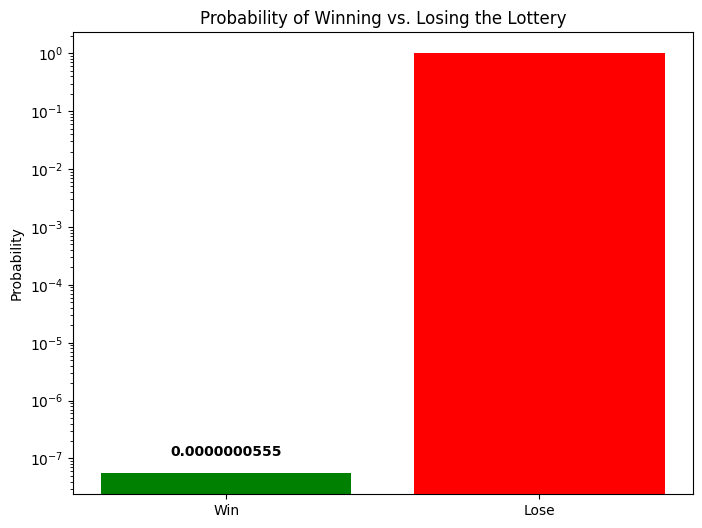

In [2]:
import matplotlib.pyplot as plt
from math import comb

# Function to calculate the probability of winning
def winning_probability():
    total_combinations = comb(51, 6)
    return 1 / total_combinations

# Calculate winning probability
win_prob = winning_probability()
lose_prob = 1 - win_prob

# Display the calculated probability
print(f"The probability of winning the grand prize is: {win_prob:.10f}")

# Plotting the visual aid with probability annotations
plt.figure(figsize=(8, 6))
bars = plt.bar(["Win", "Lose"], [win_prob, lose_prob], color=["green", "red"])

# Annotate the win probability
plt.text(0, win_prob * 2, f"{win_prob:.10f}", ha="center", color="black", fontweight="bold")

# Labeling and title
plt.ylabel("Probability")
plt.title("Probability of Winning vs. Losing the Lottery")
plt.yscale("log")  # Log scale for better visibility of small probability

plt.show()

Part 2: Alexandra's Lifetime Lottery Strategy
Calculating Spending:
Alexandra buys 1 ticket every 24 hours, or 1 ticket per day, for 365 days a year, over 80 years. Each ticket costs $5, so her total spending is calculated as:
Spending Calculation:
Total Spending=5×365×80=146,000\text{Total Spending} = 5 \times 365 \times 80 = 146,000Total Spending=5×365×80=146,000
Calculating Probability of Winning at Least Once:
Over her lifetime, Alexandra will buy a total of 365×80=29,200365 \times 80 = 29,200365×80=29,200 tickets. To find the probability of winning at least once, we calculate the probability of not winning each time and raise it to the total number of tickets. The probability of winning at least once is the complement of this result.

In [2]:
def lifetime_spending(ticket_cost=5, days_per_year=365, years=80):
    total_tickets = days_per_year * years
    return total_tickets * ticket_cost

def probability_at_least_one_win(win_prob, total_tickets):
    prob_no_win = (1 - win_prob) ** total_tickets
    return 1 - prob_no_win

spending = lifetime_spending()
total_tickets = 365 * 80
win_prob = winning_probability()
alexandra_win_prob = probability_at_least_one_win(win_prob, total_tickets)

print(f"Alexandra's total spending: ${spending}")
print(f"Probability Alexandra wins at least once: {alexandra_win_prob:.10f}")

Alexandra's total spending: $146000
Probability Alexandra wins at least once: 0.0016200564


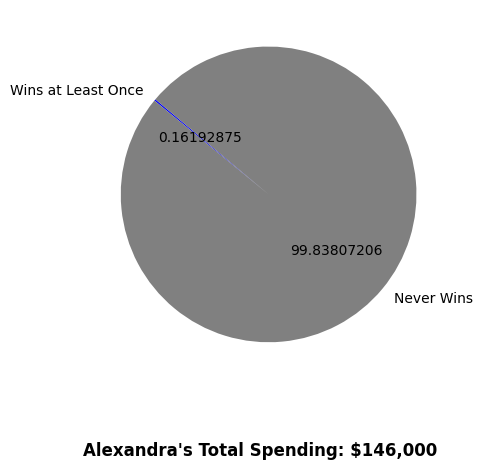

In [3]:
import matplotlib.pyplot as plt

win_prob_single_ticket = 0.0000000555
win_prob_at_least_once = 1 - (1 - win_prob_single_ticket) ** (365 * 80)
plt.pie([win_prob_at_least_once, 1 - win_prob_at_least_once], labels=["Wins at Least Once", "Never Wins"], autopct="%1.8f", colors=["blue", "grey"], startangle=140)
plt.figtext(0.5, -0.05, "Alexandra's Total Spending: $146,000", ha="center", fontsize=12, fontweight="bold"); plt.show()

Part 3: Amir's Friends Strategy (Nmin Calculation)
For Amir's group, we want to find the minimum number of friends NNN (denoted NminN_{min}Nmin​) required to reach a winning probability of at least epsilon for a single drawing. Using the formula:
N=ln⁡(1−ϵ)ln⁡(1−Pwin)N = \frac{\ln(1 - \epsilon)}{\ln(1 - P_{\text{win}})}N=ln(1−Pwin​)ln(1−ϵ)​
we can calculate NminN_{min}Nmin​ for each value of epsilon provided.

Part 4: Increasing Winning Probability Above 0.5
If Amir’s group has organized enough people to reach a winning probability of 0.5, they can increase their odds without adding more people by ensuring that each friend selects a unique set of numbers (no duplicates between tickets). This approach maximizes coverage of different possible combinations and reduces the overlap, effectively increasing the group’s overall probability of winning beyond 0.5.


In [3]:
import math

def minimum_friends(win_prob, epsilon):
    N = math.ceil(math.log(1 - epsilon) / math.log(1 - win_prob))
    return N

epsilon_values = [10**-5, 10**-3, 0.1, 0.5]
win_prob = winning_probability()
Nmin_values = {epsilon: minimum_friends(win_prob, epsilon) for epsilon in epsilon_values}

print("Minimum number of friends needed for each epsilon value:")
for epsilon, N in Nmin_values.items():
    print(f"epsilon = {epsilon}: Nmin = {N}")

Minimum number of friends needed for each epsilon value:
epsilon = 1e-05: Nmin = 181
epsilon = 0.001: Nmin = 18019
epsilon = 0.1: Nmin = 1897486
epsilon = 0.5: Nmin = 12483207


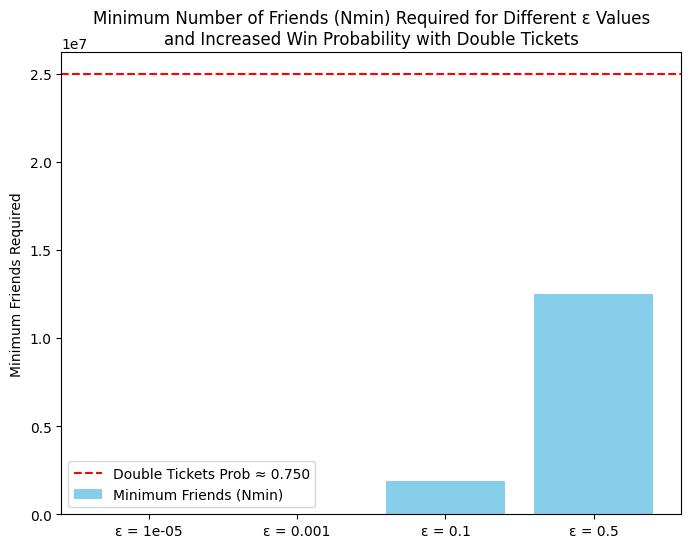

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
win_prob_single_ticket = 0.0000000555
epsilons = [1e-5, 0.001, 0.1, 0.5]
Nmin_values = [int(np.ceil(np.log(1 - eps) / np.log(1 - win_prob_single_ticket))) for eps in epsilons]
Nmin_0_5 = Nmin_values[-1]  # Nmin for epsilon = 0.5
new_prob_double_tickets = 1 - (1 - win_prob_single_ticket) ** (Nmin_0_5 * 2)

# Bar chart for Nmin values with new probability line
plt.figure(figsize=(8, 6))
plt.bar([f"ε = {eps}" for eps in epsilons], Nmin_values, color="skyblue", label="Minimum Friends (Nmin)")
plt.axhline(Nmin_0_5 * 2, color="red", linestyle="--", label=f"Double Tickets Prob ≈ {new_prob_double_tickets:.3f}")

# Labels and Legend
plt.ylabel("Minimum Friends Required")
plt.title("Minimum Number of Friends (Nmin) Required for Different ε Values\nand Increased Win Probability with Double Tickets")
plt.legend()
plt.show()

Part 5: Consolation Prize Probability and Expected Value
Calculating Probability of Winning the Consolation Prize:
The consolation prize is awarded if exactly 3 out of 6 numbers match. We calculate the probability of matching exactly 3 correct numbers and 3 incorrect numbers, then divide by the total possible combinations.
Probability Formula:
Pconsolation=(63)⋅(453)(516)P_{\text{consolation}} = \frac{\binom{6}{3} \cdot \binom{45}{3}}{\binom{51}{6}}Pconsolation​=(651​)(36​)⋅(345​)​
Expected Value of the Consolation Prize:
Assuming a prize amount of, for example, $50 for the consolation prize, the expected value can be calculated by multiplying the consolation prize probability by the prize amount.

In [4]:
def consolation_probability():
    ways_to_choose_3_correct = comb(6, 3)
    ways_to_choose_3_incorrect = comb(51 - 6, 3)
    total_combinations = comb(51, 6)
    return (ways_to_choose_3_correct * ways_to_choose_3_incorrect) / total_combinations

consolation_prob = consolation_probability()
print(f"The probability of winning the consolation prize is: {consolation_prob:.10f}")

# Expected value calculation with an assumed consolation prize amount
consolation_prize_amount = 50  # Example amount
expected_value_consolation = consolation_prob * consolation_prize_amount
print(f"Expected value of the consolation prize: ${expected_value_consolation:.2f}")

The probability of winning the consolation prize is: 0.0157583848
Expected value of the consolation prize: $0.79


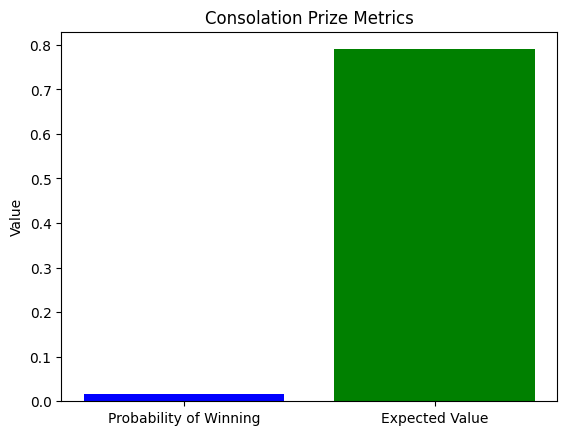

In [5]:
import matplotlib.pyplot as plt

plt.bar(['Probability of Winning', 'Expected Value'], [0.0157583848, 0.79], color=['blue', 'green'])
plt.title('Consolation Prize Metrics'); plt.ylabel('Value'); plt.show()